# Chapter 13 - Use and Remove Trends

Our time series dataset may contain a trend. A trend is a continued increase or decrease in the series over time. There can be benefit in identifying, modeling, and even removing trend information from your time series dataset.

After completing this tutorial, you will know:
- The importance and **types of trends** that may exist in time series and how to identify them.
- How to use a **simple differencing method** to remove a trend.
- How to **model a linear trend and remove it** from a sales time series dataset.

## 13.1 Trends in Time Series

A trend is a long-term increase or decrease in the level of the time series. In general, a systematic change in a time series that does not appear to be periodic is known as a trend.

Identifying and understanding trend information can aid in improving model performance; below are a few reasons:

- **Faster Modeling**: Perhaps the `knowledge of a trend or lack of a trend can suggest methods` and make model selection and evaluation more efficient.
- **Simpler Problem**: Perhaps we can `correct or remove the trend to simplify modeling` and improve model performance.
- **More Data**: Perhaps we can `use trend information`, directly or as a summary, to `provide additional information to the model` and improve model performance.

### 13.1.1 Types of Trends

There are all kinds of trends.

- **Deterministic Trends**: These are trends that `consistently increase or decrease`.
- **Stochastic Trends**: These are trends that `increase and decrease inconsistently`.

We can think about trends in terms of their scope of observations.
- **Global Trends**: These are trends that `apply to the whole time series`.
- **Local Trends**: These are trends that `apply to parts or subsequences` of a time series.

### 13.1.2 Identifying a Trend

You can plot time series data to see if a trend is obvious or not. The dificulty is that in practice, identifying a trend in a time series can be a subjective process. As such, **extracting or removing it from the time series can be just as subjective**.

### 13.1.3 Removing a Trend

A **time series with a trend is called non-stationary**. `An identiffied trend can be modeled. Once modeled, it can be removed from the time series dataset`. This is called detrending the time series. If a **dataset does not have a trend or we successfully remove** the trend, `the dataset is said to be trend stationary`.

### 13.1.4 Using Time Series Trends in Machine Learning

From a machine learning perspective, a trend in your data represents two opportunities:
- **Remove Information**: To remove systematic `information that distorts the relationship` between input and output variables.
- **Add Information**: To add systematic `information to improve the relationship` between input and output variables.

Speciffically, a trend **can be removed from your time series data (and data in the future) as a data preparation and cleaning exercise**. This is common when using statistical methods for time series forecasting, **but does not always improve results when using machine learning models**. Alternately, a **trend can be added, either directly or as a summary, as a new input variable to the supervised learning problem** to predict the output variable.

## 13.2 Shampoo Sales Dataset

This dataset describes the monthly number of sales of shampoo over a 3 year period.

## 13.3 Detrend by Differencing

Speciffically, a new series is constructed where the value at the current time step is calculated as the difference between the original observation and the observation at the previous time step.

    value(t) = observation(t) - observation(t-1)

C:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


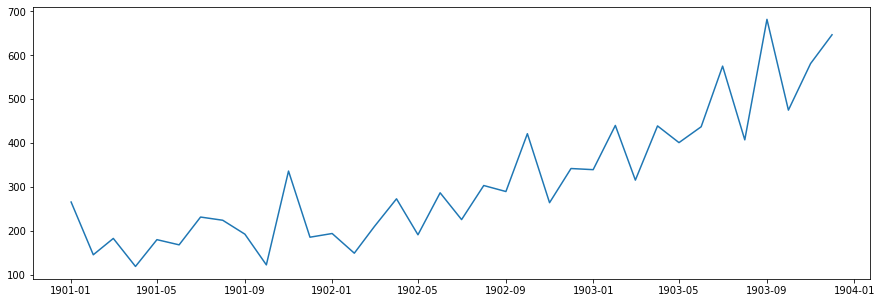

In [1]:
# detrend a time series using differencing
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pylab import rcParams

%matplotlib inline

def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

csvfile = '.\\code\\chapter_13\\shampoo-sales.csv'

series = read_csv(csvfile, header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)

rcParams['figure.figsize'] = 15, 5
pyplot.plot(series)
pyplot.show()

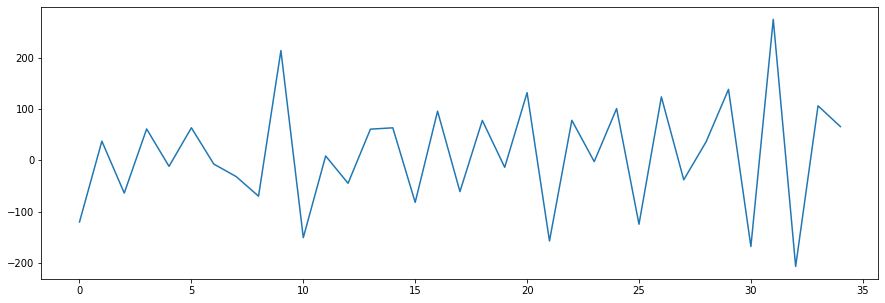

In [2]:
X = series.values
diff = list()

for i in range(1, len(X)):
    value = X[i] - X[i - 1]
    diff.append(value)

rcParams['figure.figsize'] = 15, 5
pyplot.plot(diff)
pyplot.show()

**This approach works well for data with a linear trend**. If the **trend is quadratic** (the change in the trend also increases or decreases), then a difference of the already-differenced dataset can be taken, a second level of differencing. This process can be further repeated if needed.

## 13.4 Detrend by Model Fitting

**Linear trends** can be `summarized by a linear model`, and **nonlinear trends** may be best `summarized using a polynomial` or other `curve-fitting method`. Because of the subjective and domain-specific nature of identifying trends, this approach can help to identify whether a trend is present. Even fitting a linear model to a trend that is clearly super-linear or exponential can be helpful.

The predictions from this model will form a straight line that can be taken as the trend line for the dataset. These predictions can also be subtracted from the original time series to provide a detrended version of the dataset.

    value(t) = observation(t) - prediction(t)
    
Add trend after prediccion

    value(t) = observation(t) + prediction(t)
    
   


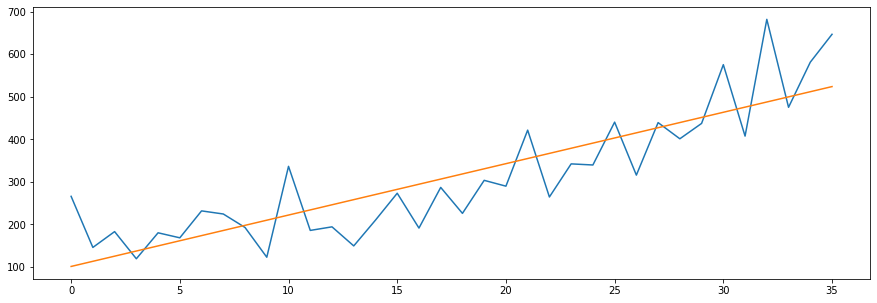

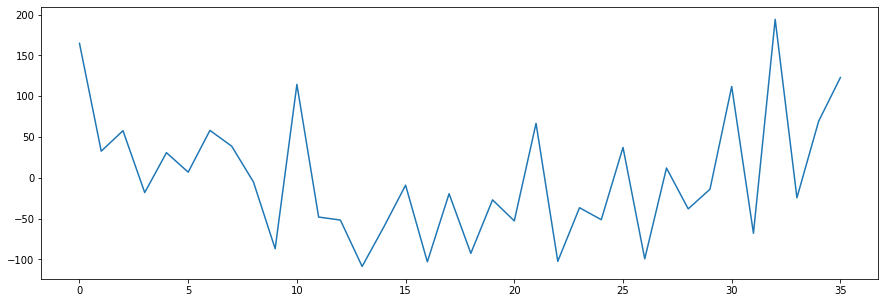

In [3]:
# use a linear model to detrend a time series
from pandas import read_csv
from pandas import datetime
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
import numpy

def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

csvfile = '.\\code\\chapter_13\\shampoo-sales.csv'

series = read_csv(csvfile, header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)

# fit linear model
X = [i for i in range(0, len(series))]
X = numpy.reshape(X, (len(X), 1))
y = series.values
model = LinearRegression()
model.fit(X, y)

# calculate trend
trend = model.predict(X)

# plot trend
rcParams['figure.figsize'] = 15, 5
#pyplot.plot(series.values)
pyplot.plot(y)
pyplot.plot(trend)
pyplot.show()

# detrend
detrended = [y[i]-trend[i] for i in range(0, len(series))]

# plot detrended
rcParams['figure.figsize'] = 15, 5
pyplot.plot(detrended)
pyplot.show()

Again, we can see that this approach has effectively detrended the dataset. There may be a parabola in the residuals, suggesting that perhaps a polynomial fit may have done a better job. Because the trend model takes only the integer index of the observation as input, it can be used on new data to either detrend or provide a new input variable for the model.